# Importando pacotes importantes

In [1]:
import torch
from util import fileutils
from nn.knn import KNN
import matplotlib.pyplot as plt

# Lendo base para realizar a memorização

In [28]:
samples, target = fileutils.reader(path='data/dados-ex1-1.csv') # Coletando dados para memorização

# Plotando base de treinamento para melhor visualização

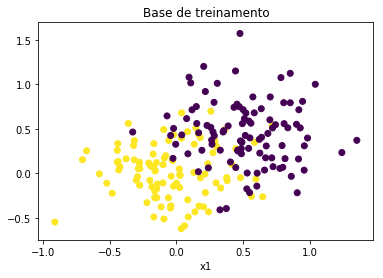

In [29]:
plt.scatter(samples[:, 0], samples[:, 1], c=target)
plt.title('Base de treinamento')
plt.xlabel('x0')
plt.xlabel('x1')
plt.show()

# Gerando a região de decisão

In [30]:
Zx, Zy = torch.meshgrid([torch.arange(-1, 1.7, 0.025), torch.arange(-1, 1.7, 0.025)])
Zx = Zx.reshape(Zx.shape[0] * Zx.shape[1])
Zy = Zy.reshape(Zy.shape[0] * Zy.shape[1])

Zz = [] # Tensor com os pares ordenados [[Zx0, Zy0], [Zx1, Zy1], ..., [Zxn, Zyn]]
for e in zip(Zx, Zy):
    Zz.append(torch.tensor([e[0], e[1]]).tolist())
Zz = torch.tensor(Zz)

# Realizando testes para K = 1, 3, 9, 27 e plotando resultados

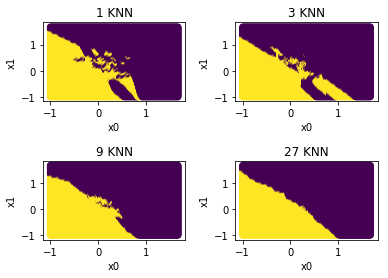

In [31]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.75, wspace=0.35)
for k, v in zip([1, 3, 9, 27], [[0, 0], [0, 1], [1, 0], [1, 1]]) :
        clf = KNN(k, samples, target)

        Z_targets = clf.predict(Zz)

        axs[v[0], v[1]].set_title('%s-KNN' % k)
        axs[v[0], v[1]].set_xlabel('x0')
        axs[v[0], v[1]].set_ylabel('x1')

        axs[v[0], v[1]].scatter(Zx, Zy, c=Z_targets)
plt.show()

# Conclusão
